In [178]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#import libraries

 
Instructions

Gary, the VP of Marketing, is looking to spend his marketing budget wisely. He’s asking you to help figure out whom to market to. Gary sent you a list of 1,000 leads that he previously marketed to. (See attached file: leads.csv.)

Your colleague, Ariana, sent you a list of current clients. (See attached file: Current Clients.xlsx.)

Gary has his weekly check-in with our CEO Ryan in one hour. He’s asking for a recommendation of where to spend out marketing budget based on the data available.

Please analyze the attached data sets and send your analysis to Gary along with a recommendation on which type of clients we should market to.

Please limit the time you spend answering Gary to one hour, or he’ll have to go into the meeting with Ryan without your input. Gary’s tied up in another meeting this hour, and so will not be able to answer any clarifying questions. If there are any ambiguities, please use your best judgement.


In [179]:
df_lead = pd.read_csv('leads.csv')
df_client = pd.read_csv('current_clients.csv')
#load lead and client files

In [180]:
df_lead.head()

,first_name,last_name,age,gender,debt,city,state,zip
0,Terrye,Gunnell,60.0,Female,"$101,876",Springfield,MA,1152
1,Rodolph,Gerb,47.0,Male,"$92,052",Worcester,MA,1605
2,Glynis,D'orsay,56.0,Female,"$72,343",Worcester,MA,1654
3,Alvie,Vennart,73.0,Male,"$76,304",Woburn,MA,1813
4,Brantley,Chalker,87.0,Male,"$22,570",Boston,MA,2114


In [181]:
df_client.head()

,Client_ID,First_Name,Last_Name,City,State,ZIP
0,1,Vincenty,Vanyard,Hollywood,FL,33028
1,2,Pattie,Okeshott,Scottsdale,AZ,85271
2,3,Olenka,Blackler,Phoenix,AZ,85020
3,4,Georgia,Elby,Virginia Beach,VA,23454
4,5,Sheelah,Petris,Cleveland,OH,44111


In [182]:
df_lead.tail()
#need to count all NaN rows

,first_name,last_name,age,gender,debt,city,state,zip
995,Sigrid,Clevely,39.0,Female,NaN,Spokane,WA,99215
996,Hank,Effnert,62.0,Male,"$89,054",Spokane,WA,99215
997,Harley,Lodder,37.0,Male,"$100,941",Spokane,WA,99252
998,Mose,Warwick,88.0,Male,"$33,860",Anchorage,AK,99507
999,Willi,Sivess,68.0,Male,"$62,314",Juneau,AK,99812


In [183]:
df_lead.isna().sum().sum()
#64 rows with NaN values
#need to delete all rows

64

In [184]:
df_lead.dropna()

,first_name,last_name,age,gender,debt,city,state,zip
0,Terrye,Gunnell,60.0,Female,"$101,876",Springfield,MA,1152
1,Rodolph,Gerb,47.0,Male,"$92,052",Worcester,MA,1605
2,Glynis,D'orsay,56.0,Female,"$72,343",Worcester,MA,1654
3,Alvie,Vennart,73.0,Male,"$76,304",Woburn,MA,1813
4,Brantley,Chalker,87.0,Male,"$22,570",Boston,MA,2114
...,...,...,...,...,...,...,...,...
994,Shane,Ciccottio,86.0,Male,"$17,211",Vancouver,WA,98687
996,Hank,Effnert,62.0,Male,"$89,054",Spokane,WA,99215
997,Harley,Lodder,37.0,Male,"$100,941",Spokane,WA,99252
998,Mose,Warwick,88.0,Male,"$33,860",Anchorage,AK,99507


In [185]:
df_client.tail()

,Client_ID,First_Name,Last_Name,City,State,ZIP
175,176,Crystal,Ratley,Henderson,NV,89074
176,177,Talbot,McTerry,San Bernardino,CA,92415
177,178,Granger,Goudard,London,KY,40745
178,179,Sarene,Lowy,Boynton Beach,FL,33436
179,180,Vanya,Lamond,Houston,TX,77245


In [186]:
df_client.isna().sum().sum()
#no NaN values in clients csv

0

In [187]:
df_lead.dtypes
#need to change debt to a float

first_name     object
last_name      object
age           float64
gender         object
debt           object
city           object
state          object
zip             int64
dtype: object

In [188]:
df_lead['debt'] = df_lead['debt'].str.replace('$','')
df_lead['debt'] = df_lead['debt'].str.replace(',', '')
#need to get rid of special characters in the column 'debt'

In [189]:
df_lead['debt'] = df_lead['debt'].astype(str).astype(float)
#debt column is now a float

In [190]:
df_lead.head()
#everything looks good now

,first_name,last_name,age,gender,debt,city,state,zip
0,Terrye,Gunnell,60.0,Female,101876.0,Springfield,MA,1152
1,Rodolph,Gerb,47.0,Male,92052.0,Worcester,MA,1605
2,Glynis,D'orsay,56.0,Female,72343.0,Worcester,MA,1654
3,Alvie,Vennart,73.0,Male,76304.0,Woburn,MA,1813
4,Brantley,Chalker,87.0,Male,22570.0,Boston,MA,2114


In [191]:
df_client.dtypes

Client_ID      int64
First_Name    object
Last_Name     object
City          object
State         object
ZIP            int64
dtype: object

Let's explor the data now

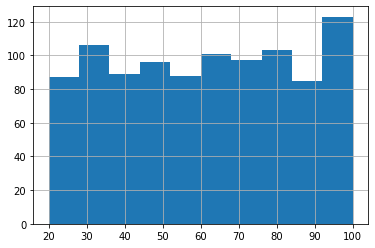

In [192]:
df_lead.age.hist();
#age range is 20-100

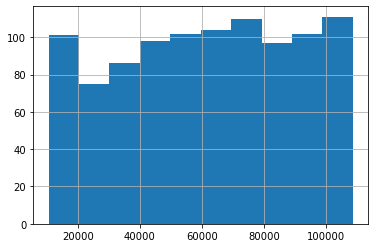

In [193]:
df_lead.debt.hist();
#debt range is about 10k-110k

In [194]:
df_client['State'].value_counts()

TX    19
FL    17
CA    15
OH    13
TN     8
PA     7
UT     7
NY     6
NC     6
WI     6
MN     6
IN     5
KY     5
MO     5
WA     4
LA     4
SC     4
AZ     4
MS     3
WV     3
MI     3
IA     3
KS     3
OR     3
VA     2
GA     2
NV     2
IL     2
CT     2
DC     2
CO     2
OK     1
AR     1
NM     1
AL     1
ID     1
NE     1
WY     1
Name: State, dtype: int64

In [195]:
df_client.shape[0]

180

In [196]:
(19+17+15+13)/180
#36% of the current clients are in Texas, Florida, California, and Ohio 
#New York is 8th on the list for reference

0.35555555555555557

In [197]:
df_lead['state'].value_counts()

CA    112
TX     97
FL     69
NY     50
OH     45
DC     34
PA     30
NC     29
IL     29
WA     27
GA     27
OK     27
VA     27
TN     26
CO     25
NV     24
AL     24
MO     21
LA     20
MN     19
IN     19
MI     18
KS     18
AZ     17
MA     15
UT     14
WI     14
KY     13
CT     13
NJ     10
MD     10
IA      9
SC      9
NM      9
OR      9
NE      7
WV      7
MS      4
ID      4
HI      4
SD      3
WY      3
AR      3
AK      2
ND      2
VT      1
DE      1
Name: state, dtype: int64

In [198]:
df_lead.shape[0]

1000

In [199]:
(112+97+69+50+45)/1000
#37% of the leads are in California, Texas, Florida, New York, and Ohio

0.373

35% of the current clients reside in Texas, Florida, California, and Ohio respectfully. 37% of the leads reside in California, Texas, Florida, New York, and Ohio respectfully. New York is number 8 on the current client list but number 4 on the leads list.

In [200]:
#need to seperate age groups in leads
twenties = df_lead[(df_lead['age']>=20) & (df_lead['age']<=29)]
thirties = df_lead[(df_lead['age']>=30) & (df_lead['age']<=39)]
fourties = df_lead[(df_lead['age']>=40) & (df_lead['age']<=49)]
fifties = df_lead[(df_lead['age']>=50) & (df_lead['age']<=59)]
sixties = df_lead[(df_lead['age']>=60) & (df_lead['age']<=69)]
seventies = df_lead[(df_lead['age']>=70) & (df_lead['age']<=79)]
eighties = df_lead[(df_lead['age']>=80) & (df_lead['age']<=89)]
ninties = df_lead[(df_lead['age']>=90) & (df_lead['age']<=99)]
hundred = df_lead[df_lead['age']==100]

In [201]:
twenties.shape[0]
#the number of people in their 20s

113

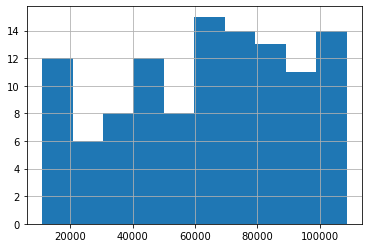

In [202]:
twenties.debt.hist();

In [203]:
thirties.shape[0]
#30s

129

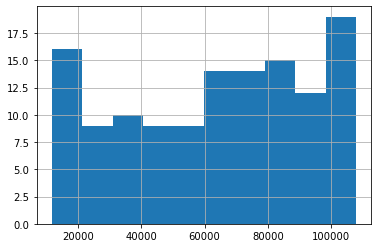

In [204]:
thirties.debt.hist();

In [205]:
fourties.shape[0]
#40s

110

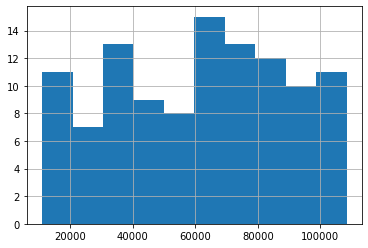

In [206]:
fourties.debt.hist();

In [207]:
fifties.shape[0]
#50s

114

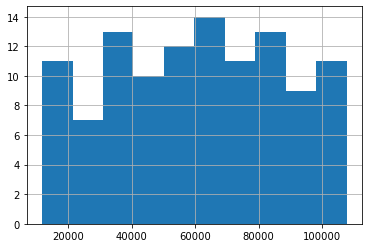

In [208]:
fifties.debt.hist();

In [209]:
sixties.shape[0]
#60s

127

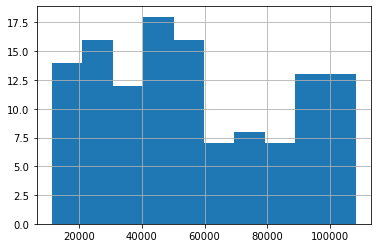

In [210]:
sixties.debt.hist();

In [211]:
seventies.shape[0]
#70s

119

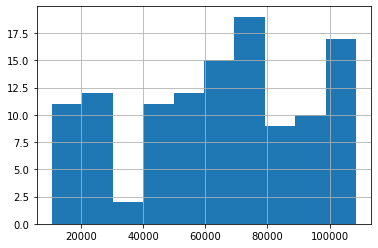

In [212]:
seventies.debt.hist();

In [213]:
eighties.shape[0]
#80s

116

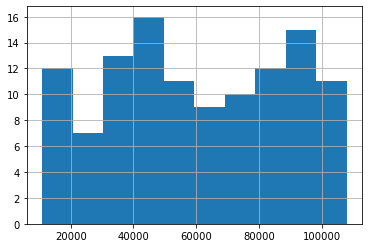

In [214]:
eighties.debt.hist();

In [215]:
ninties.shape[0]
#90s

132

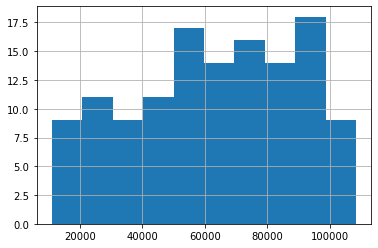

In [216]:
ninties.debt.hist();

In [217]:
hundred.shape[0]
#100

15

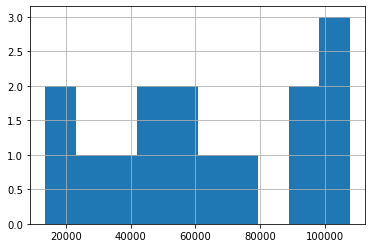

In [218]:
hundred.debt.hist();

In [219]:
df_lead.nlargest(10, 'debt')
#don't see much of a coorelation with high amount of debt

,first_name,last_name,age,gender,debt,city,state,zip
470,Rogerio,Udey,20.0,Male,108568.0,Detroit,MI,48275
914,Sydelle,Ewenson,71.0,Female,108533.0,Santa Barbara,CA,93150
23,Gerome,McKenney,20.0,Male,108516.0,New Haven,CT,6533
701,Tressa,Everson,91.0,Female,108389.0,Houston,TX,77255
982,Cristian,Swale,48.0,Male,108354.0,Tacoma,WA,98405
330,Carson,Layne,62.0,Male,108251.0,Port Saint Lucie,FL,34985
155,Adrienne,Thurby,NaN,NaN,108203.0,Bowie,MD,20719
827,Decca,Lethcoe,64.0,Male,108020.0,Las Vegas,NV,89105
533,Marsiella,Elcomb,NaN,NaN,107913.0,Chicago,IL,60614
38,Mateo,Yakobowitz,35.0,Male,107908.0,Trenton,NJ,8650


C:\Users\Liam Slyne\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


<AxesSubplot:xlabel='age', ylabel='debt'>

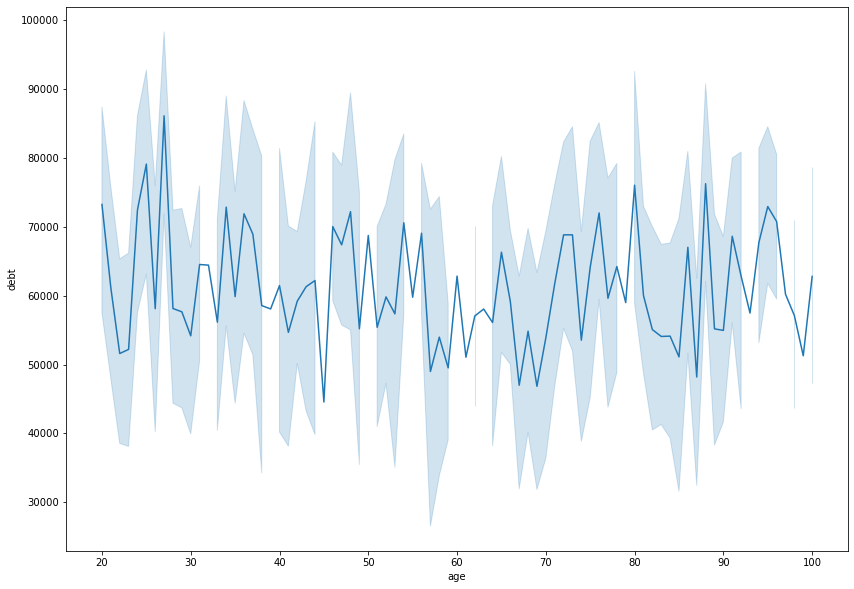

In [220]:
plt.figure(figsize = [14,10])
sns.lineplot(data=df_lead, x="age", y="debt")

There seems to be no coorelation between age and debt amount.

In [221]:
#let's find out where each decade of people live
twenties['state'].value_counts()
#Texas and California

TX    15
CA    15
NY     6
CT     5
OH     5
FL     5
MO     4
MN     4
GA     4
KY     4
DC     4
MI     3
TN     3
CO     3
LA     3
NV     3
WA     3
PA     2
MD     2
VA     2
WI     2
MA     2
HI     2
NM     1
NE     1
IL     1
AZ     1
NC     1
UT     1
SC     1
OR     1
IN     1
NJ     1
KS     1
ID     1
Name: state, dtype: int64

In [222]:
thirties['state'].value_counts()
#Texas, Florida, and California

TX    17
FL    11
CA    11
OK     7
NC     7
AL     6
WA     6
PA     5
MI     5
NV     4
MA     4
CO     4
OH     3
IA     3
LA     3
AZ     3
KS     3
MN     3
MO     3
TN     3
NY     3
VA     2
UT     2
NJ     2
IL     2
GA     2
DC     1
NM     1
SC     1
AR     1
OR     1
Name: state, dtype: int64

In [223]:
fourties['state'].value_counts()
#California and Florida

CA    12
FL    10
TX     9
NY     8
OH     7
PA     5
WA     5
LA     4
VA     4
NV     3
TN     3
NC     3
GA     3
MO     3
DC     3
SC     2
KS     2
AL     2
AZ     2
CO     2
MN     2
IL     2
CT     2
NJ     1
IN     1
OR     1
WV     1
WI     1
ID     1
NM     1
OK     1
MI     1
AR     1
MA     1
UT     1
Name: state, dtype: int64

In [224]:
fifties['state'].value_counts()
#California

CA    14
TX     9
FL     8
NY     7
OH     7
TN     5
AL     4
WI     4
NC     4
GA     4
OK     3
NV     3
LA     3
IL     3
MO     3
NE     3
HI     2
MA     2
PA     2
SD     2
DC     2
IN     2
MN     2
WA     2
VA     2
NM     1
MD     1
CT     1
WV     1
KY     1
UT     1
SC     1
IA     1
NJ     1
KS     1
AZ     1
ND     1
Name: state, dtype: int64

In [225]:
sixties['state'].value_counts()
#Texas, California, and FLorida

TX    17
CA    15
FL    12
VA     6
OK     5
TN     5
NC     5
NY     5
IL     5
CO     4
KS     3
IN     3
PA     3
UT     3
MD     3
WA     3
WI     3
OH     2
MA     2
AL     2
GA     2
NV     2
LA     2
KY     2
MI     2
IA     2
MN     1
MS     1
WV     1
AZ     1
OR     1
MO     1
AK     1
DC     1
WY     1
Name: state, dtype: int64

In [226]:
seventies['state'].value_counts()
#California and Texas

CA    14
TX    10
NY     9
FL     8
DC     8
PA     6
OK     4
MN     4
NV     4
CO     4
IL     4
IN     3
WI     3
VA     3
NC     3
KS     3
AL     2
NE     2
NJ     2
GA     2
OR     2
NM     2
LA     2
MS     2
KY     1
MA     1
TN     1
MO     1
WV     1
OH     1
UT     1
SC     1
MI     1
IA     1
WA     1
AZ     1
CT     1
Name: state, dtype: int64

In [227]:
eighties['state'].value_counts()
#California and Ohio

CA    15
OH    13
FL     5
GA     5
VA     5
IL     4
WA     4
IN     4
CT     4
DC     4
CO     4
TX     3
NV     3
OK     3
AL     3
NC     3
UT     3
MO     3
MI     3
AZ     3
SC     2
MA     2
MD     2
PA     2
NY     2
MN     2
KY     2
AK     1
ID     1
KS     1
LA     1
AR     1
NJ     1
OR     1
WV     1
Name: state, dtype: int64

In [228]:
ninties['state'].value_counts()
#Texas and California

TX    14
CA    12
DC     9
FL     8
OH     6
NY     6
TN     5
IL     5
OK     4
AL     4
PA     4
MO     3
KS     3
GA     3
NC     3
KY     3
AZ     3
CO     3
WV     2
LA     2
OR     2
WY     2
VA     2
NM     2
MI     2
IN     2
NJ     2
NE     1
MA     1
SD     1
VT     1
NV     1
MD     1
WI     1
MS     1
MN     1
UT     1
SC     1
IA     1
WA     1
ID     1
DE     1
ND     1
Name: state, dtype: int64

Notes: Market to California, Texas, Florida, New York, and Ohio.

 Notes: 20s = TX and CA
30s = TX, FL, and CA
40s = CA and FL
50s = CA
60s = TX, CA, and FL
70s = CA and TX
80s = CA and OH
90s = TX and CA

After exploring the current clients, 35% reside in Texas, Florida, California, and Ohio. 
In the potential leads 37% reside in California, Texas, Florida, New York, and Ohio.
The age groups (split by decade for example 20s, 30s, etc.) and amount of debt do not have enough coorlation to investigate further. 
The top states for all age groups are Texas, Florida, and California. 
The number of people in each age group are similiar in number as well.